In [1]:
#colab drive baplantısı
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import VGG16
import matplotlib.pyplot as plt
from keras import optimizers
from time import sleep as sl
from keras import layers
from keras import models
import os, shutil
import numpy as np
from keras.models import Sequential


In [6]:
cd 

/content/drive/MyDrive/cnnComputerVision


In [7]:
base_dir = 'cats_and_dogs_small'

# dataset was uncompressed
original_dataset_dir = 'train'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [8]:
conv_base=VGG16(weights=('imagenet'),
                include_top=False,
                input_shape=(150,150,3)
                )

58892288/58889256 [==============================] - 0s 0us/step


In [9]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [10]:
model=Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


# Freeze model

In [12]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [13]:
conv_base.trainable = False


In [14]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


# Training the model end to end with a frozen conv base

In [15]:

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 794s 8s/step - loss: 0.6360 - acc: 0.6465 - val_loss: 0.4518 - val_acc: 0.8070
Epoch 2/30
100/100 [==============================] - 21s 215ms/step - loss: 0.4949 - acc: 0.7722 - val_loss: 0.3717 - val_acc: 0.8580
Epoch 3/30
100/100 [==============================] - 21s 213ms/step - loss: 0.4210 - acc: 0.8099 - val_loss: 0.3292 - val_acc: 0.8770
Epoch 4/30
100/100 [==============================] - 22s 216ms/step - loss: 0.3881 - acc: 0.8310 - val_loss: 0.3102 - val_acc: 0.8590
Epoch 5/30
100/100 [==============================] - 22s 218ms/step - loss: 0.3976 - acc: 0.8224 - val_loss: 0.2893 - val_acc: 0.8840
Epoch 6/30
100/100 [==============================] - 22s 217ms/step - loss: 0.3578 - acc: 0.8379 - val_loss: 0.2828 - val_acc: 0.8900
Epoch 7/30
100/100 [==============================] - 21s 209ms/step - loss: 0.3552 - acc: 0.8336 - val_loss

In [16]:
model.save('cats_and_dogs_small_3.h5')


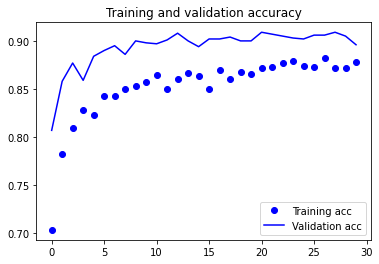

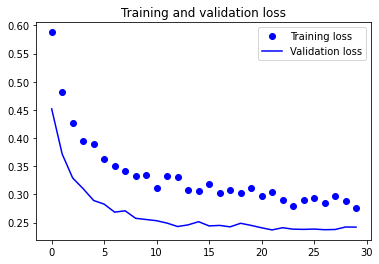

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As you can see, we reach a validation accuracy of about 90%. This is much better than our small convnet trained from scratch.

